In [1]:
# Omid55
import sys
import numpy as np
sys.path.append('../src')
import teams_of_teams_problem
import seaborn as sns
import time
import matplotlib.pyplot as plt
import methods

% matplotlib inline

In [2]:
def plot_all_for_problem(problem):
    n = problem.n
    m = problem.m
    t = problem.t
    # a distribution of all score functions
    # creating a population
    population_size = 10000
    population = []
    for i in range(population_size):
        people = np.random.choice(n, m * t, replace=False)
        instance = [list(sorted(people[i * m:(i + 1) * m])) for i in range(t)]
        population.append(instance)
    # computing their fitnesses
    # objectives
    objs = [problem.score1, problem.score2, problem.score3, problem.objective_function]
    for obj in objs:
        print(obj)
        start_time = time.time()
        fitnesses = np.zeros(population_size)
        for i, instance in enumerate(population):
            fitnesses[i] = obj(instance)
        duration = round(time.time() - start_time, 2)
        print('min:', min(fitnesses), ', max:', max(fitnesses), \
              ', mean:', np.mean(fitnesses), ', std:', np.std(fitnesses))
        print('(in ', duration, 's).')
        print('Linear transformation: (x-', min(fitnesses), ')*', 1 / (max(fitnesses) - min(fitnesses)))
        # plotting
        #sns.distplot(fitnesses)
        plt.hist(fitnesses)
        plt.show()
        print('\n')


def sample_for_score3():
    prob = teams_of_teams_problem.Problem(n=8, m=2, t=3, s=1)
    prob.risk_takings = np.array([0, 0.2, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9])
    # prob.risk_takings = np.array([0.1, 0.1, 0.3, 0.5, 0.9, 0.9, 0.2, 0.5])
    # prob.risk_takings = np.array([0, 0, 0.3, 0.5, 1, 1, 0.2, 0.5])
    print(prob.score3([[0, 1], [4, 5], [6, 7]]))
    print(prob.score3([[2, 3], [4, 5], [6, 7]]))


def sample_for_score1():
    prob = teams_of_teams_problem.Problem(n=7, m=3, t=1, s=2)
    # prob.skills = np.array([[0.5,0.1], [0.2,0.3], [0.1,0.5], [0.5,0.1], [0.3,0.4]])
    prob.skills = np.array([[0.5, 0.1], [0.2, 0.3], [0.1, 0.5], [0.3, 0.3], [0.3, 0.4], [0.5, 0.2], [0.45, 0.15]])
    byoptimal = methods.ByOptimal(prob)
    optimal_team = byoptimal.solve(prob.score1)
    print(optimal_team)
    print('Optimal:\t\t', prob.score1(optimal_team))


def run(RESCALE=True, DISTRIBUTION='Uniform'):
    prob = teams_of_teams_problem.Problem(n=1000, m=10, t=16, s=8, alpha=1/3, beta=1/3, RESCALE=RESCALE, DISTRIBUTION=DISTRIBUTION)
    plot_all_for_problem(prob)

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7f8c6ffae780>>
min: 0.8353073632279662 , max: 0.8877218825537153 , mean: 0.8621706205994049 , std: 0.007381061949825177
(in  26.08 s).
Linear transformation: (x- 0.8353073632279662 )* 19.07868302263988


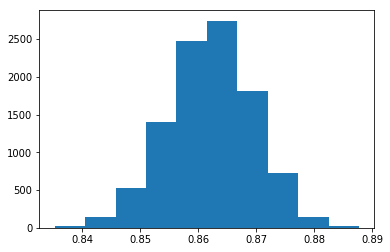



<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7f8c6ffae780>>
min: 0.7834735928055516 , max: 0.8628021558829517 , mean: 0.8182660821943143 , std: 0.009777487067717965
(in  13.3 s).
Linear transformation: (x- 0.7834735928055516 )* 12.605799994439705


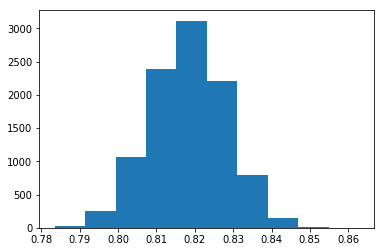



<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7f8c6ffae780>>
min: 0.2839396192965362 , max: 0.4499459380142017 , mean: 0.35364741260767907 , std: 0.022851161660156466
(in  16.83 s).
Linear transformation: (x- 0.2839396192965362 )* 6.023867089666302


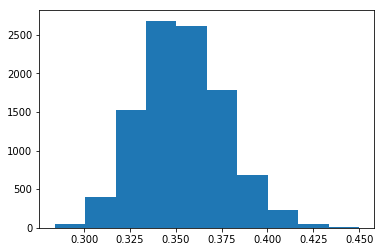



<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7f8c6ffae780>>
min: 0.6518156810684363 , max: 0.7188578818970459 , mean: 0.6780280384671328 , std: 0.008771778468613376
(in  58.12 s).
Linear transformation: (x- 0.6518156810684363 )* 14.915978109914022


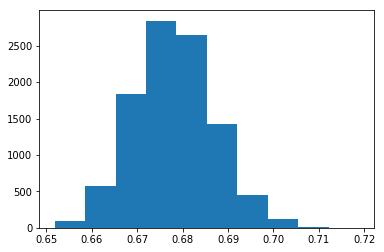

In [3]:
run(RESCALE=False, DISTRIBUTION='Uniform')

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7f8c6ffaec18>>
min: 0.6928792781730359 , max: 0.7437937166880044 , mean: 0.7188343622293831 , std: 0.006820810040929322
(in  26.5 s).
Linear transformation: (x- 0.6928792781730359 )* 19.640794029497258


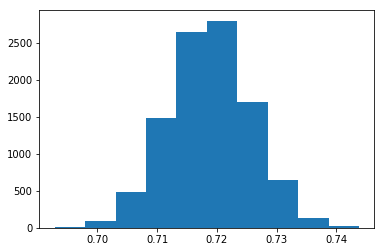



<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7f8c6ffaec18>>
min: 0.7569434982361376 , max: 0.838893170944695 , mean: 0.7985749922963531 , std: 0.010452860363467563
(in  13.37 s).
Linear transformation: (x- 0.7569434982361376 )* 12.20261127285232


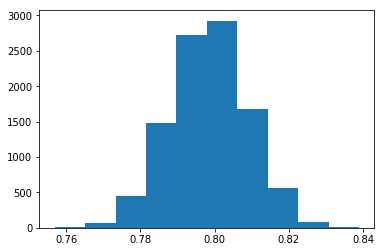



<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7f8c6ffaec18>>
min: 0.43211137653327625 , max: 0.5951449851132541 , mean: 0.5213372879887563 , std: 0.02117150218724176
(in  16.78 s).
Linear transformation: (x- 0.43211137653327625 )* 6.133704631272021


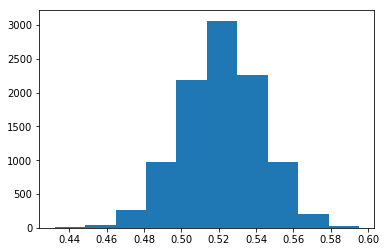



<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7f8c6ffaec18>>
min: 0.6404818980248422 , max: 0.7140368478012933 , mean: 0.6795822141714974 , std: 0.008249684721910821
(in  57.96 s).
Linear transformation: (x- 0.6404818980248422 )* 13.595278129333378


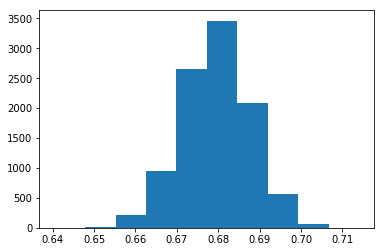

In [4]:
run(RESCALE=False, DISTRIBUTION='Normal')

# With (sampling) Normalization

Computing boundaries was done in:  5.87 s.

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7f8c6d0107f0>>
min: 0.04344437475534634 , max: 0.9931234940348823 , mean: 0.5215348640799934 , std: 0.11445550140267623
(in  26.55 s).
Linear transformation: (x- 0.04344437475534634 )* 1.0529872455852662


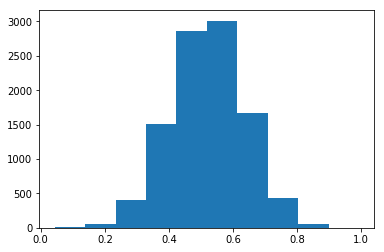



<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7f8c6d0107f0>>
min: 0.026681980086775435 , max: 0.9433830201718252 , mean: 0.49306517500154706 , std: 0.12249057375899035
(in  13.65 s).
Linear transformation: (x- 0.026681980086775435 )* 1.090868185234329


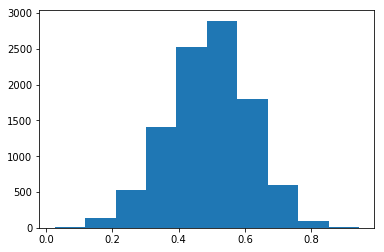



<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7f8c6d0107f0>>
min: -0.015470867905850975 , max: 0.959480963557192 , mean: 0.3827464296237822 , std: 0.1341960146760397
(in  17.05 s).
Linear transformation: (x- -0.015470867905850975 )* 1.0256916985317819


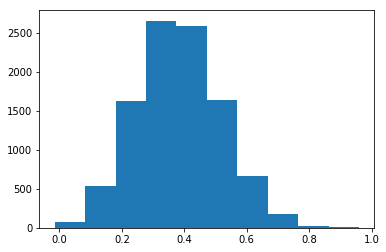



<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7f8c6d0107f0>>
min: 0.1563891519829456 , max: 0.7275041012930715 , mean: 0.4657821562351076 , std: 0.07163124118657418
(in  58.4 s).
Linear transformation: (x- 0.1563891519829456 )* 1.7509609951690854


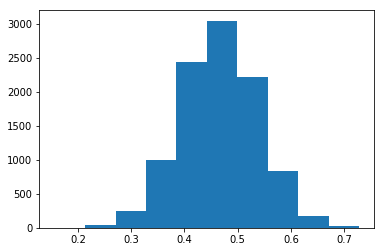

In [5]:
run(RESCALE=True, DISTRIBUTION='Uniform')

Computing boundaries was done in:  6.03 s.

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7f8c6d1b1dd8>>
min: 0.022122244644315503 , max: 0.9095390477613071 , mean: 0.5051618160183611 , std: 0.1118892136006261
(in  26.92 s).
Linear transformation: (x- 0.022122244644315503 )* 1.1268661991609439


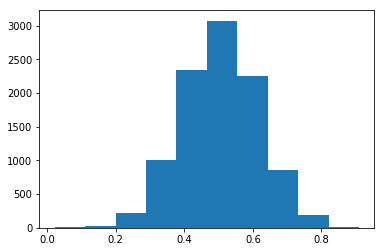



<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7f8c6d1b1dd8>>
min: 0.026854815165448652 , max: 0.9635270270699373 , mean: 0.524484478154472 , std: 0.12453775792727736
(in  13.9 s).
Linear transformation: (x- 0.026854815165448652 )* 1.0676093379206266


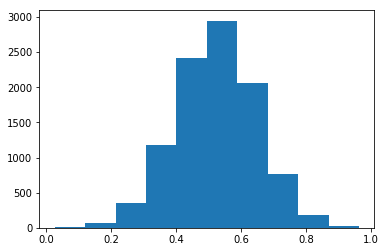



<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7f8c6d1b1dd8>>
min: -0.0018258630942325203 , max: 1.0685134136765988 , mean: 0.5294474405912132 , std: 0.14524921796883652
(in  16.73 s).
Linear transformation: (x- -0.0018258630942325203 )* 0.9342831957143141


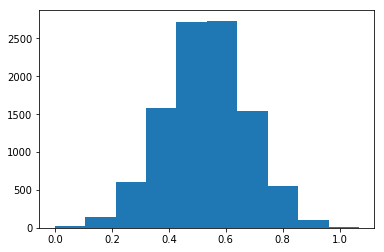



<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7f8c6d1b1dd8>>
min: 0.2577763790349417 , max: 0.8026112540211132 , mean: 0.5196979115880155 , std: 0.07396510929088967
(in  58.45 s).
Linear transformation: (x- 0.2577763790349417 )* 1.8354184834907659


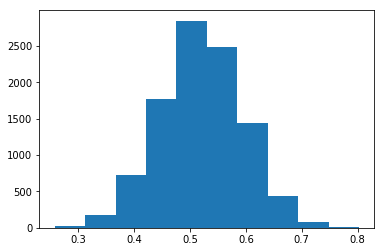

In [6]:
run(RESCALE=True, DISTRIBUTION='Normal')